# Assignment 2 (Steam)

### 0. Import packages and define functions

In [4]:
# Import any packages here
import gzip
import pandas as pd
import random
import operator
from collections import defaultdict
import numpy as np
from random import choice
from matplotlib import pyplot as plt

In [5]:
# Define any functions here
def readCSV(path):
    f = gzip.open(path, 'rt', encoding="utf8")
    values = []
    for line in f:
        fields = eval(line)
        values.append(fields)
    return values

### 1. Read Data

In [ ]:
all_reviews = readCSV("steam_reviews.json.gz")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



In [4]:
# Load review data
all_games = readCSV("steam_games.json.gz")


In [5]:
all_games[0]

{'publisher': 'Kotoshiro',
 'genres': ['Action', 'Casual', 'Indie', 'Simulation', 'Strategy'],
 'app_name': 'Lost Summoner Kitty',
 'title': 'Lost Summoner Kitty',
 'url': 'http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/',
 'release_date': '2018-01-04',
 'tags': ['Strategy', 'Action', 'Indie', 'Casual', 'Simulation'],
 'discount_price': 4.49,
 'reviews_url': 'http://steamcommunity.com/app/761140/reviews/?browsefilter=mostrecent&p=1',
 'specs': ['Single-player'],
 'price': 4.99,
 'early_access': False,
 'id': '761140',
 'developer': 'Kotoshiro'}

In [6]:
len(all_games)

32135

In [27]:
publisher, genres, app_name, title, url, release_date, tags, discount_price, reviews_url, specs, price, early_access, game_id, developer = ([],) * 14
publisher = defaultdict(int)
genres = defaultdict(int)
tags = defaultdict(int)
early_access = defaultdict(int)
for game in all_games:
    if 'publisher' in game:
        publisher[game['publisher']] += 1 
    if 'genres' in game:
        for genre in game['genres']:
            genres[genre] +=1
    if 'price' in game:
        price.append(game['price'])
    if 'tags' in game:
        for tag in game['tags']:
            tags[tag] += 1
    if 'early_access' in game:
        early_access[game['early_access']] += 1

In [28]:
early_access

defaultdict(int, {False: 30188, True: 1947})

In [29]:
1947/30188

0.06449582615608851

In [101]:
gid, tags, price, specs, gname = [],[],[],[], []

for game in all_games:
    if 'id' in game and 'tags' in game and 'price' in game and 'app_name' in game:
        gid.append(game['id'])
        tags.append(game['tags'])
        price.append(game['price'])
        gname.append(game['app_name'])
    else:
        continue
zip_data = list(zip(gid, gname, tags, price))
random.shuffle(zip_data)
# Format user data into a dataframe
game_data = pd.DataFrame({'item_id':list(d[0] for d in zip_data),'game_name':list(d[1] for d in zip_data),
                         'tags':list(d[2] for d in zip_data), 'price':list(d[3] for d in zip_data)})
# Show what user data look like
game_data[:5]


,item_id,game_name,tags,price
0,320120,Meadowland,"[Indie, Simulation, Exploration, Fantasy, Expe...",3.99
1,428840,Grimoire: Manastorm - Ice Class,"[Action, Free to Play, Indie]",2.99
2,673360,Black Mist,"[Action, Adventure, Indie]",4.99
3,542120,Win Big Or Die,"[Free to Play, Action, Shooter]",Free To Play
4,615200,HackyZack - Original Sountrack,"[Action, Indie, Sports]",1.99


In [102]:
len(game_data)

30626

In [103]:
i = 0
for price in game_data['price']:
    if type(price) != float and 'free' in price.lower():
        game_data['price'][i] = 0.00
    i += 1

In [104]:
game_data[:5]


,item_id,game_name,tags,price
0,320120,Meadowland,"[Indie, Simulation, Exploration, Fantasy, Expe...",3.99
1,428840,Grimoire: Manastorm - Ice Class,"[Action, Free to Play, Indie]",2.99
2,673360,Black Mist,"[Action, Adventure, Indie]",4.99
3,542120,Win Big Or Die,"[Free to Play, Action, Shooter]",0
4,615200,HackyZack - Original Sountrack,"[Action, Indie, Sports]",1.99


In [105]:
i = 0
for price in game_data['price']:
    if type(price) != float:
        game_data = game_data.drop(i, axis = 0)
    i += 1

In [106]:
len(game_data)

30616

In [107]:
game_data.to_csv('game_data.csv')

In [108]:
len(game_data)

30616

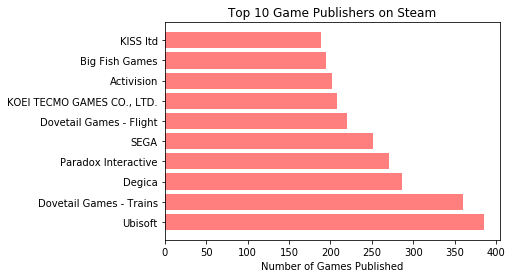

In [5]:
pub = []
num = []
for entry in publisher:
    pub.append(entry)
    num.append(publisher[entry])
sorted_games = sorted(publisher.items(), key=operator.itemgetter(1), reverse=True)
pub = []
num = []
for entry in sorted_games[0:10]:
    pub.append(entry[0])
    num.append(entry[1])

y_pos = np.arange(len(pub))
performance = num
plt.barh(y_pos, performance, align='center', alpha=0.5, color='r')
plt.yticks(y_pos, pub)
plt.xlabel('Number of Games Published')
plt.title('Top 10 Game Publishers on Steam')

plt.show()

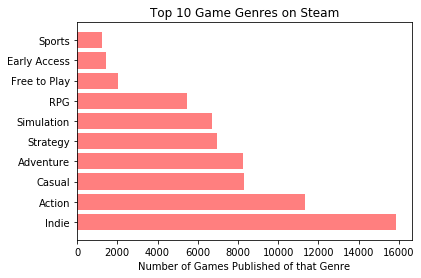

In [6]:
genre = []
g_num = []
for entry in genres:
    genre.append(entry)
    g_num.append(genres[entry])
    
zipped_genre = list(zip(g_num, genre))
count = []
genre_pop = []
zipped_genre.sort()
zipped_genre.reverse()
zipped_genre
for num, genre in zipped_genre[0:10]:
    genre_pop.append(genre)
    count.append(num)
y_pos = np.arange(len(genre_pop))
performance = count
plt.barh(y_pos, performance, align='center', alpha=0.5, color='r')
plt.yticks(y_pos, genre_pop)
plt.xlabel('Number of Games Published of that Genre')
plt.title('Top 10 Game Genres on Steam')

plt.show()

In [7]:
type(price[0])

float

In [31]:
i = 0
for p in price:
    
    if type(p) != float and 'free' in p.lower():
        price[i] = 0.00
    i += 1

In [38]:
len(price)

30758

In [41]:
for p in price:
    if type(p) != float:
        print(p)

Install Now
Play WARMACHINE: Tactics Demo
Install Theme
Third-party
Play Now
Play the Demo
Starting at $499.00
Starting at $449.00
Play Now
Third-party


In [39]:
price_filtered = []

for p in price:
    if type(p) != float:
        continue
    price_filtered.append(p)

In [46]:
np.mean(price_filtered)

8.869738519578508

In [48]:
max(price_filtered)

995.0

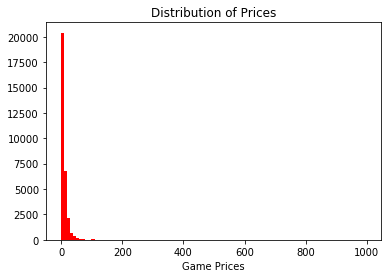

In [12]:
plt.hist(price_filtered,color="red", bins=100)  
plt.xlabel('Game Prices')
plt.title('Distribution of Prices')

plt.show()

In [49]:
price_filtered_n = []

for p in price_filtered:
    if p > 60:
        continue
    price_filtered_n.append(p)

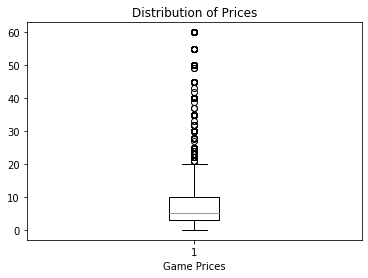

In [54]:

A = plt.boxplot(price_filtered_n)

plt.xlabel('Game Prices')
plt.title('Distribution of Prices')

plt.show()


In [55]:
[item.get_ydata() for item in A['whiskers']]

[array([2.99, 0.  ]), array([ 9.99, 20.  ])]

In [5]:
aus_users = readCSV("australian_users_items.json.gz")
# Retrieve needed columns from user data
user_id, item_id, item_name, play_time = [],[],[],[]
for user in aus_users:
    uid = user['user_id']
    for item in user['items']:
        user_id.append(uid)
        item_id.append(item['item_id'])
        item_name.append(item['item_name'])
        play_time.append(int(item['playtime_forever']))
# Shuffle user data
zip_data = list(zip(user_id, item_id, item_name, play_time))
random.shuffle(zip_data)
# Format user data into a dataframe
all_user = pd.DataFrame({'user_id':list(d[0] for d in zip_data),'item_id':list(d[1] for d in zip_data),
                         'item_name':list(d[2] for d in zip_data),'play_time':list(d[3] for d in zip_data)})
# Show what user data look like
all_user[:5]

,user_id,item_id,item_name,play_time
0,djnemonic,367670,Controller Companion,1
1,lobbie,33930,Arma 2: Operation Arrowhead,0
2,archangel147,104200,BEEP,27
3,CustomURLNo963,212070,Star Conflict,79
4,76561198033394656,201810,Wolfenstein: The New Order,437


In [ ]:
aus_users = readCSV("australian_users_items.json.gz")
# Retrieve needed columns from user data
user_id, item_id, item_name, play_time, play_time_2_wk = [],[],[],[], []
for user in aus_users:
    uid = user['user_id']
    for item in user['items']:
        user_id.append(uid)
        item_id.append(item['item_id'])
        item_name.append(item['item_name'])
        play_time.append(int(item['playtime_forever']))
        play_time_2_wk.append(int(item['playtime_2weeks']))
# Shuffle user data
zip_data = list(zip(user_id, item_id, item_name, play_time, play_time_2_wk))
random.shuffle(zip_data)
# Format user data into a dataframe
all_user = pd.DataFrame({'user_id':list(d[0] for d in zip_data),'item_id':list(d[1] for d in zip_data),
                         'item_name':list(d[2] for d in zip_data),'play_time':list(d[3] for d in zip_data), 'play_time_2weeks':list(d[4] for d in zip_data)})
# Show what user data look like
all_user[:5]

In [6]:
aus_users[0]

{'user_id': '76561197970982479',
 'items_count': 277,
 'steam_id': '76561197970982479',
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
 'items': [{'item_id': '10',
   'item_name': 'Counter-Strike',
   'playtime_forever': 6,
   'playtime_2weeks': 0},
  {'item_id': '20',
   'item_name': 'Team Fortress Classic',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '30',
   'item_name': 'Day of Defeat',
   'playtime_forever': 7,
   'playtime_2weeks': 0},
  {'item_id': '40',
   'item_name': 'Deathmatch Classic',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '50',
   'item_name': 'Half-Life: Opposing Force',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '60',
   'item_name': 'Ricochet',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '70',
   'item_name': 'Half-Life',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '130',
   'item_name': 'Half-Life: Blue Shift',
   'playtime_forever

In [74]:
all_user.to_csv('all_user.csv')

In [16]:
all_user_items = all_user.groupby('item_name') 
all_user_items.first() 


,user_id,item_id,play_time
item_name,,,
神明的一天世界(God's One Day World),76561198070585472,490390,0
! That Bastard Is Trying To Steal Our Gold !,SquirrelJoe,449940,0
"""Glow Ball"" - The billiard puzzle game",76561198064894873,388390,0
#SelfieTennis,DJSean,392190,8
#SkiJump,robinwalker,392150,0
...,...,...,...
丛林守望者（Ranger of the jungle）,twinturboskyline,495010,0
侠客风云传(Tale of Wuxia),76561197998683345,377530,92
大海战 Navy Field IV,CSMisBeast,481890,0


In [17]:
Aus_Player_time = all_user_items['play_time'].sum().sort_values(ascending=False).head(10)

In [31]:
Aus_Player_time

item_name
Counter-Strike: Global Offensive    785184267
Garry's Mod                         448366616
Terraria                            154974541
The Elder Scrolls V: Skyrim         136678626
Warframe                            124027703
Counter-Strike: Source              112612047
Left 4 Dead 2                       102189423
PAYDAY 2                             99763914
Sid Meier's Civilization V           82380684
Rust                                 81120416
Name: play_time, dtype: int64

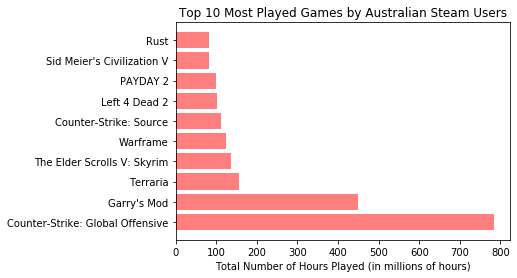

In [34]:
y_pos = Aus_Player_time.index
performance = Aus_Player_time.values/1000000
plt.barh(y_pos, performance, align='center', alpha=0.5, color='r')
plt.yticks(y_pos, Aus_Player_time.index)
plt.xlabel('Total Number of Hours Played (in millions of hours)')
plt.title('Top 10 Most Played Games by Australian Steam Users')

plt.show()

In [35]:
Aus_Player_items = all_user.groupby('item_name')['item_name'].count().sort_values(ascending=False).head(10)

In [36]:
Aus_Player_items

item_name
Dota 2 Test                         49571
Counter-Strike: Global Offensive    43776
Garry's Mod                         43301
Unturned                            38682
Left 4 Dead 2                       37044
Left 4 Dead 2 Beta                  37044
Terraria                            29239
Warframe                            25807
Portal 2                            24465
Counter-Strike: Source              24220
Name: item_name, dtype: int64

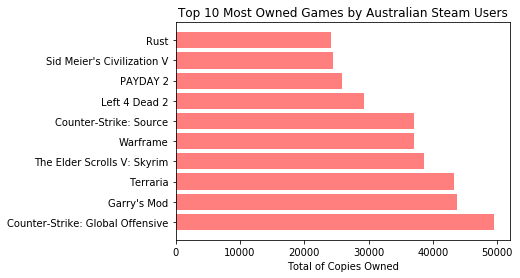

In [38]:
y_pos = Aus_Player_items.index
performance = Aus_Player_items.values
plt.barh(y_pos, performance, align='center', alpha=0.5, color='r')
plt.yticks(y_pos, Aus_Player_time.index)
plt.xlabel('Total of Copies Owned')
plt.title('Top 10 Most Owned Games by Australian Steam Users')

plt.show()

In [40]:
# Load review data
reviews = readCSV("australian_user_reviews.json.gz")
# Retrieve needed columns from review data
user_id, item_id, review, time_posted = [],[],[],[]
for user in reviews:
    uid = user['user_id']
    for item in user['reviews']:
        user_id.append(uid)
        item_id.append(item['item_id'])
        review.append(item['review'])
        time_posted.append(item['posted'][7:])
# Shuffle review data
zip_review = list(zip(user_id, item_id, review, time_posted))
random.seed(1234)
random.shuffle(zip_review)
# Format review data into a dataframe
all_review = pd.DataFrame({'user_id':list(d[0] for d in zip_review), 'item_id':list(d[1] for d in zip_review),
                           'review':list(d[2] for d in zip_review),'time_posted':list(d[3] for d in zip_review)})
# Show what review data look like
all_review[:5]

,user_id,item_id,review,time_posted
0,76561198085013601,250320,"Great game, terrible save system...",February 27.
1,76561198142474106,363620,would be yes if this game didnt cost more than...,"December 7, 2015."
2,bentan312,440,Slapped a guy with a fish.10/10 would do again.,"July 29, 2014."
3,potatoskins,233270,bright colors hurt my eyes10/10 must buy,August 21.
4,Mineturdle321,208090,stupidly addictive,"January 31, 2014."


In [41]:
all_review.to_csv('all_review.csv')

In [31]:
# Load user data
aus_users = readCSV("australian_users_items.json.gz")
# Retrieve needed columns from user data
user_id, item_id, item_name, play_time = [],[],[],[]
for user in aus_users:
    uid = user['user_id']
    for item in user['items']:
        user_id.append(uid)
        item_id.append(item['item_id'])
        item_name.append(item['item_name'])
        play_time.append(int(item['playtime_forever']))
# Shuffle user data
zip_data = list(zip(user_id, item_id, item_name, play_time))
random.shuffle(zip_data)
# Format user data into a dataframe
all_user = pd.DataFrame({'user_id':list(d[0] for d in zip_data),'item_id':list(d[1] for d in zip_data),
                         'item_name':list(d[2] for d in zip_data),'play_time':list(d[3] for d in zip_data)})
# Show what user data look like
all_user[:5]

,user_id,item_id,item_name,play_time
0,76561198070316224,301520,Robocraft,3
1,best_luck_ever,320,Half-Life 2: Deathmatch,0
2,76561198071743525,238460,BattleBlock Theater,227
3,76561197994851773,730,Counter-Strike: Global Offensive,3005
4,lecomptedelric,219640,Chivalry: Medieval Warfare,1856


### 2. Split data

In [10]:
## Split data into training set, validation set and test set
train_user, valid_user, test_user = np.split(all_user.sample(frac=1), [int(.6*len(all_user)), int(.8*len(all_user))])
## Create dictionaries
itemsPerUser, usersPerItem = defaultdict(list), defaultdict(list)
for i in range(0, len(train_user)):
    u = train_user.iloc[i,0]
    i = train_user.iloc[i,1]
    itemsPerUser[u].append(i)
    usersPerItem[i].append(u)
n_user = len(itemsPerUser.keys())
n_item = len(usersPerItem.keys())

# 先别看这里！！！都是没用的code
# unread_book = []
# for i in range(0, len(valid_data)):
#     array = list(set(all_book)-set(valid_data.iloc[i,1]))
#     unread_book.append(choice(array))
    
# add_data = pd.DataFrame({'user': valid_user,
#                          'book': unread_book,
#                          'read': 0})
# valid = valid_data.append(add_data)

In [16]:
len(test_user)

1030642

In [11]:
n_user,n_item

(69134, 10587)